### Relevant imports and data load

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [196]:
# load data which is stored in the /data folder of the project
train_data = pd.read_csv('../data/train_filled_up.csv', sep=',', header=0)

In [3]:
target_variable = train_data["SalePrice"]

In [26]:
print(target_variable.shape[0])

1459


### Central routines

In [201]:
# check for normality
def check_normality(variable):
    sns.distplot(variable, fit=norm)
    kurtosis = stats.kurtosis(variable)
    skewness = stats.skew(variable)
    print("mean vs. std of variable. Impact expected if <4: ", variable.mean()/variable.std())
    print("kurtosis. Should be 0: ", kurtosis)
    print("z_kurtosis. Should be <2.58 and >-2.58. (1.96 respectively): ", kurtosis / (np.sqrt(24 / variable.shape[0])))
    print("skewness. Should be 0: ", skewness)
    print("z_skew: should be <2.58 and >-2.58. (1.96 respectively):", skewness / (np.sqrt(6 / variable.shape[0])))

In [198]:
def check_linearity(variable):
    stats.probplot(variable, plot=plt)

In [199]:
def check_homoscedacity(variable_X, variable_Y):
    sns.regplot(x=variable_X, y=variable_Y)

In [6]:
# print the low range and the high range of a (scaled) variable
def print_ranges(low_range, high_range):
    print('outer range (low) of the distribution')
    print(low_range)
    print('outer range (high) of the distribution')
    print(high_range)

In [7]:
# scale a given variable and print its low and high ranges
def scale_variable(variable):
    scaled_variable = StandardScaler().fit_transform(variable.values.reshape(-1,1))
    low_range = scaled_variable[scaled_variable[:,0].argsort()][:10]
    high_range = scaled_variable[scaled_variable[:,0].argsort()][-10:]
    print_ranges(low_range, high_range)
    return scaled_variable

## Analyze target variable

In [8]:
target_variable.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
print(target_variable.mean()/target_variable.std())

2.2767428392987763


Ratio is <4.0 transformation might have noticeable effect

##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


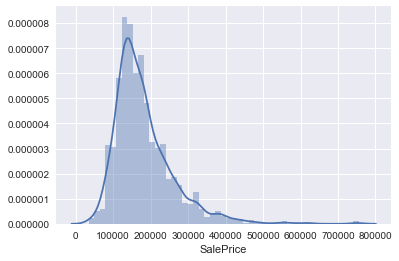

In [9]:
sns.distplot(target_variable)

In [11]:
saleprice_scaled = scale_variable(target_variable)

outer range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


/Users/claudine/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


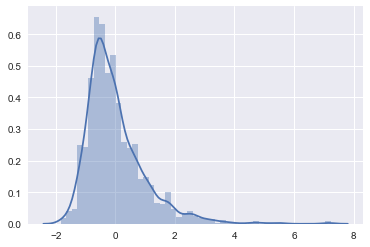

In [12]:
sns.distplot(saleprice_scaled)

In [30]:
kurtosis = stats.kurtosis(target_variable)
z_kurtosis = kurtosis / (np.sqrt(24 / target_variable.shape[0]))

In [31]:
print(kurtosis)
print(z_kurtosis)

6.502799105301849
50.701681457


Kurtosis is >0 and z_kurtosis is not between +-1.96 nor +-2.58. Both indicates non-normality. 

In [32]:
skewness = stats.skew(target_variable)
z_skew = skewness / (np.sqrt(6 / target_variable.shape[0]))

In [33]:
print(skewness)
print(z_skew)

1.880007613681095
29.316466839


Skewness is >0 and z_skew is not between +-1.96 nor +-2.58. Both indicates non-normality.

##### Linearity

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74187.860388132001, 180930.39479095273, 0.9320032714937404))

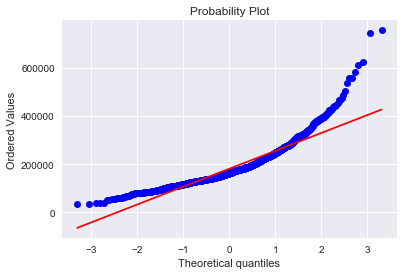

In [15]:
stats.probplot(target_variable, plot=plt)

##### Transformation

Analyze log, sqrt and negative inverse transformation of target_variable. Best result achieved with log transformation. 

In [64]:
log_target_variable = np.log(target_variable)

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


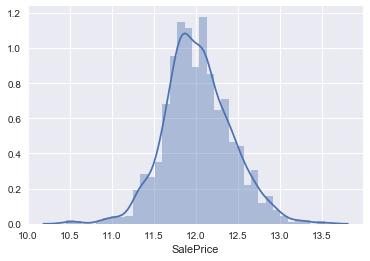

In [65]:
sns.distplot(log_target_variable)

In [66]:
stats.kurtosis(log_target_variable)

0.8000555650770789

In [67]:
stats.skew(log_target_variable)

0.12119299622459463

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.3984035944009483, 12.024047688135333, 0.99538724215158225))

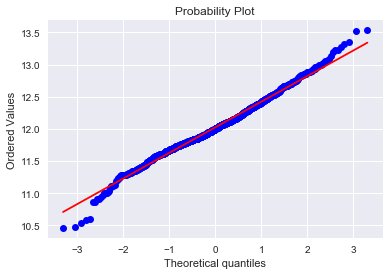

In [68]:
stats.probplot(log_target_variable, plot=plt)

In [69]:
transformed_target_variable = log_target_variable

## Analyze numeric predictor variables
- Normality
- Homoscedacity
- Linearity
- Independence errors

In [70]:
transformed_train_data = train_data
transformed_train_data = transformed_train_data.drop(["Id", "SalePrice"], axis=1)

#### LotFrontage

In [19]:
train_data['LotFrontage'].describe()

count    1459.000000
mean       70.047936
std        22.031439
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [77]:
print(train_data['LotFrontage'].mean()/train_data['LotFrontage'].std())

3.1794535753021558


mean vs. deviation is <4.0 transformation might have essential impact.

##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


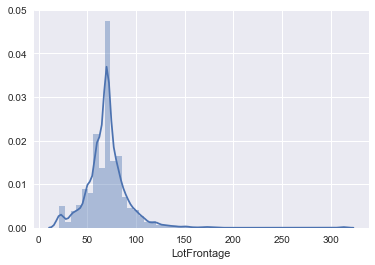

In [74]:
sns.distplot(train_data['LotFrontage'])

In [75]:
stats.kurtosis(train_data['LotFrontage'])

21.753826241504083

In [76]:
stats.skew(train_data['LotFrontage'])

2.3820008516574918

Skewness, kurtosis and ratio indicate that we will have noticeable effects and transformation is required. 

##### Linearity

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  21.,   21.,   21., ...,  182.,  313.,  313.])),
 (20.320861548482071, 70.047936406661336, 0.92083411704878881))

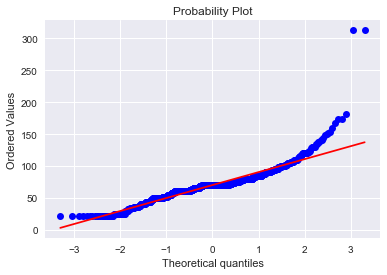

In [73]:
stats.probplot(train_data['LotFrontage'], plot=plt)

##### Homoscedascity

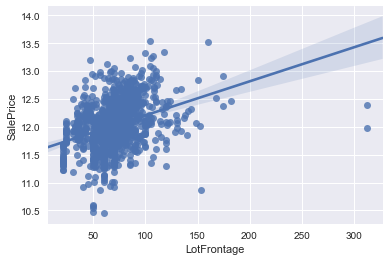

In [74]:
sns.regplot(x=train_data['LotFrontage'], y=log_target_variable)

##### Transformation

In [114]:
log_LotFrontage = np.log(train_data['LotFrontage'])

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


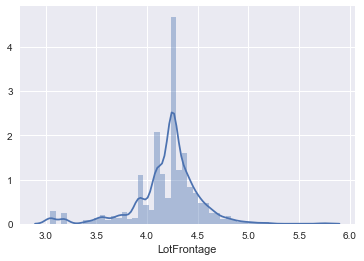

In [115]:
sns.distplot(log_LotFrontage)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 3.04452244,  3.04452244,  3.04452244, ...,  5.20400669,
          5.74620319,  5.74620319])),
 (0.30479370290425056, 4.2013049823235793, 0.94839971219803121))

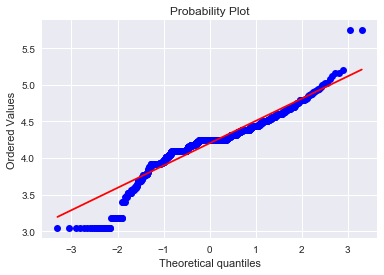

In [116]:
stats.probplot(log_LotFrontage, plot=plt)

In [117]:
stats.kurtosis(log_LotFrontage)

3.5379446557134413

In [118]:
stats.skew(log_LotFrontage)

-0.929037556752434

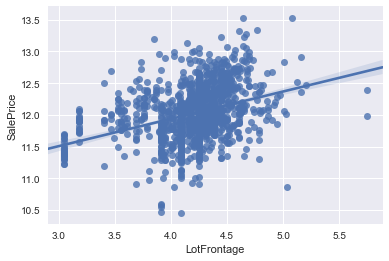

In [119]:
sns.regplot(x=log_LotFrontage, y=log_target_variable)

In [105]:
transformed_train_data['LotFrontage'] = log_LotFrontage

#### LotArea

In [94]:
train_data['LotArea'].describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

In [106]:
print(train_data['LotArea'].mean()/train_data['LotArea'].std())

1.0533515759362726


##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


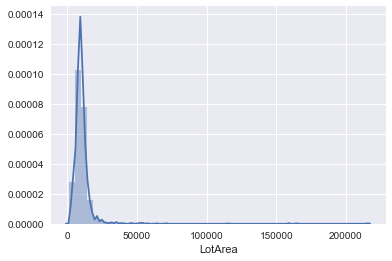

In [107]:
sns.distplot(train_data['LotArea'])

In [120]:
stats.kurtosis(train_data['LotArea'])

202.4021200620506

In [121]:
stats.skew(train_data['LotArea'])

12.190881211708346

##### Linearity

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  1300,   1477,   1491, ..., 159000, 164660, 215245])),
 (5888.7613579663621, 10516.828082191783, 0.58900765049099102))

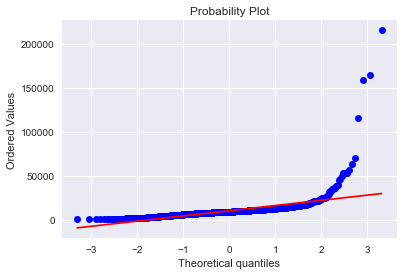

In [75]:
stats.probplot(train_data['LotArea'], plot=plt)

##### Homoscedascity

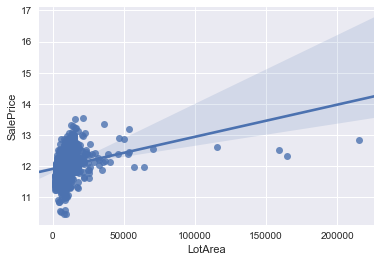

In [125]:
sns.regplot(x=train_data['LotArea'], y=log_target_variable)

##### Transformation

In [134]:
log_LotArea = np.log(train_data['LotArea'])

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


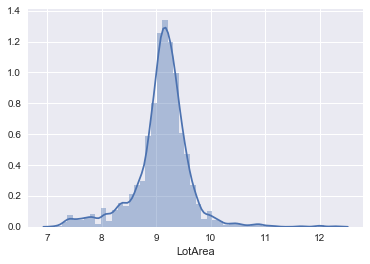

In [135]:
sns.distplot(log_LotArea)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  7.17011954,   7.29776828,   7.30720231, ...,  11.97665948,
          12.01163802,  12.27953219])),
 (0.493001949125077, 9.1107884487733326, 0.95086324442403958))

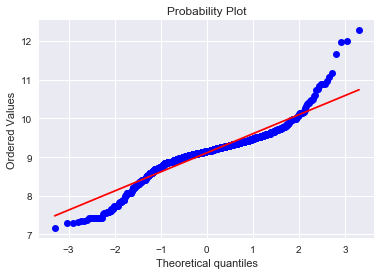

In [136]:
stats.probplot(log_LotArea, plot=plt)

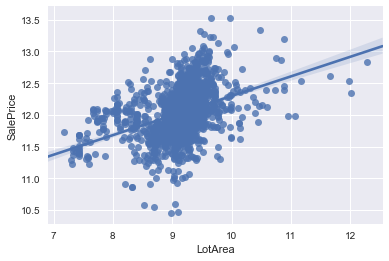

In [137]:
sns.regplot(x=log_LotArea, y=log_target_variable)

In [138]:
transformed_train_data['LotArea'] = log_LotArea

#### BsmtFinSF1

##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


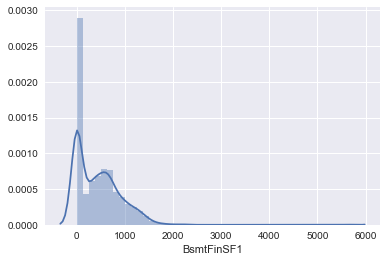

In [139]:
sns.distplot(train_data['BsmtFinSF1'])

In [140]:
stats.kurtosis(train_data['BsmtFinSF1'])

11.079614521816836

In [141]:
stats.skew(train_data['BsmtFinSF1'])

1.683464547154765

In [142]:
train_data['BsmtFinSF1'].mean() / train_data['BsmtFinSF1'].std()

0.9733338100939859

##### Linearity

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([    0.,     0.,     0., ...,  2188.,  2260.,  5644.])),
 (420.29691291368579, 443.94379712131609, 0.91996681029403027))

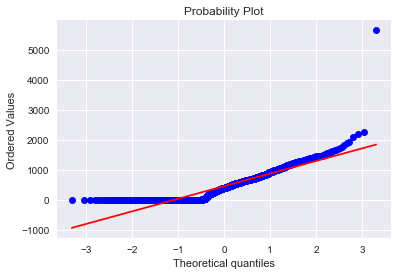

In [143]:
stats.probplot(train_data['BsmtFinSF1'], plot=plt)

##### Homoscedacity

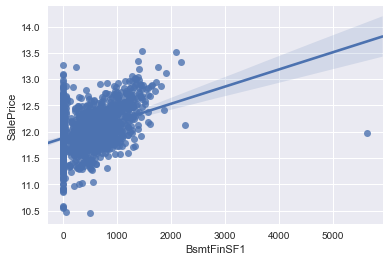

In [146]:
sns.regplot(x=train_data['BsmtFinSF1'], y=log_target_variable)

##### Transformation

In [147]:
sqrt_bsmtfinsf1 = np.sqrt(train_data['BsmtFinSF1'])

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


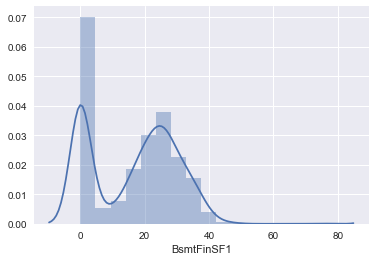

In [148]:
sns.distplot(sqrt_bsmtfinsf1)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  0.        ,   0.        ,   0.        , ...,  46.77606225,
          47.5394573 ,  75.12655988])),
 (12.350617754786144, 16.466188623793876, 0.9376472357668072))

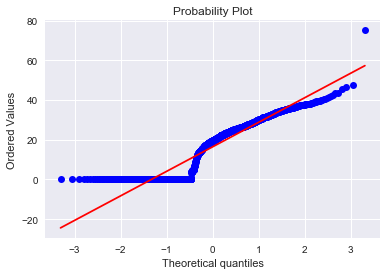

In [149]:
stats.probplot(sqrt_bsmtfinsf1, plot=plt)

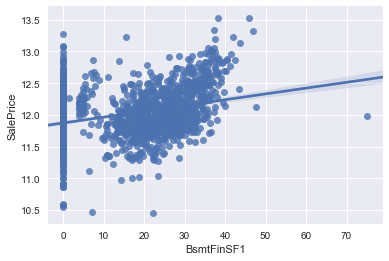

In [150]:
sns.regplot(x=sqrt_bsmtfinsf1, y=log_target_variable)

In [151]:
transformed_train_data['BsmtFinSF1'] = train_data['BsmtFinSF1']

#### BsmtUnfSF

##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


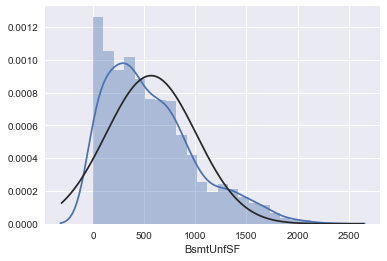

In [189]:
sns.distplot(train_data['BsmtUnfSF'], fit=norm)

In [153]:
stats.kurtosis(train_data['BsmtUnfSF'])

0.4666389204867132

In [154]:
stats.skew(train_data['BsmtUnfSF'])

0.9183665716935966

In [155]:
train_data['BsmtUnfSF'].mean() / train_data['BsmtUnfSF'].std()

1.2836555881388414

##### Linearity

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([    0.,     0.,     0., ...,  2121.,  2153.,  2336.])),
 (427.18128792133297, 567.3660041124059, 0.96489391813774317))

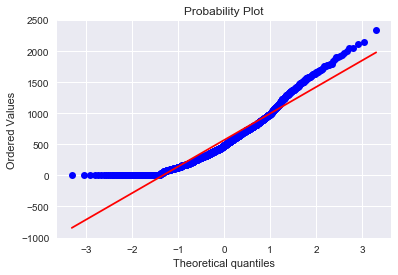

In [157]:
stats.probplot(train_data['BsmtUnfSF'], plot=plt)

##### Homoscedacity

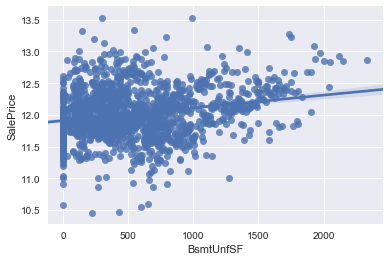

In [172]:
sns.regplot(x=train_data['BsmtUnfSF'], y=log_target_variable)

##### Transformation

In [167]:
sqrt_bsmtunfsf = np.sqrt(train_data['BsmtUnfSF'])

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


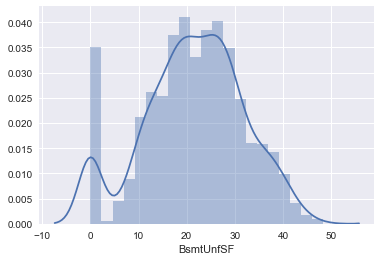

In [168]:
sns.distplot(sqrt_bsmtunfsf)

In [169]:
stats.kurtosis(sqrt_bsmtunfsf)

-0.27927883014146415

In [173]:
stats.skew(sqrt_bsmtunfsf)

-0.2465338969889268

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  0.        ,   0.        ,   0.        , ...,  46.05431576,
          46.40043103,  48.33218389])),
 (10.319890529932445, 21.426031958126821, 0.98971886541498444))

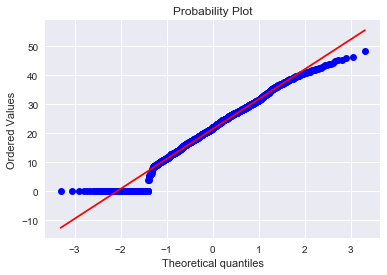

In [170]:
stats.probplot(sqrt_bsmtunfsf, plot=plt)

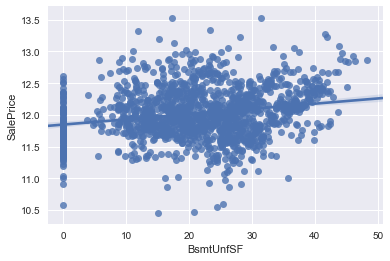

In [171]:
sns.regplot(x=sqrt_bsmtunfsf, y=log_target_variable)

In [174]:
transformed_train_data['BsmtUnfSF'] = train_data['BsmtUnfSF']

#### TotalBsmtSF

##### Normality

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


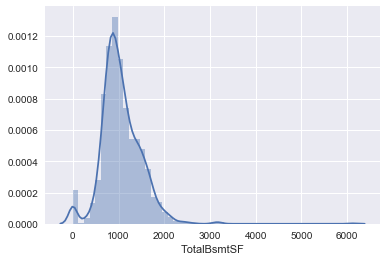

In [175]:
sns.distplot(train_data['TotalBsmtSF'])

In [176]:
stats.kurtosis(train_data['TotalBsmtSF'])

13.232154326593395

In [177]:
stats.skew(train_data['TotalBsmtSF'])

1.5251903279913543

##### Linearity

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([    0.,     0.,     0., ...,  3200.,  3206.,  6110.])),
 (420.02096734566538, 1057.8910212474298, 0.95627444352291835))

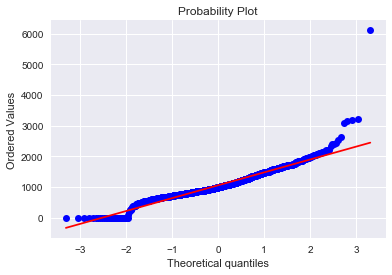

In [178]:
stats.probplot(train_data['TotalBsmtSF'], plot=plt)

##### Homoscedacity

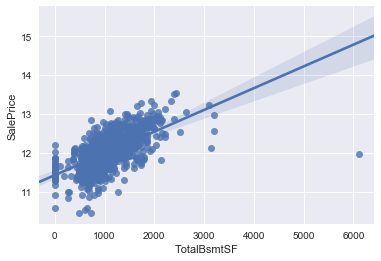

In [179]:
sns.regplot(x=train_data['TotalBsmtSF'], y=log_target_variable)

##### Transformation

In [183]:
sqrt_totalbsmtsf = np.sqrt(train_data['TotalBsmtSF'])

/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


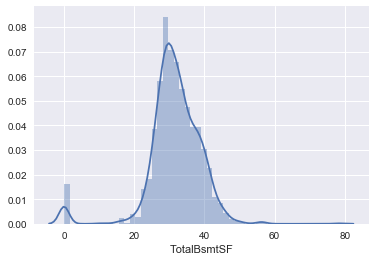

In [184]:
sns.distplot(sqrt_totalbsmtsf)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([  0.        ,   0.        ,   0.        , ...,  56.56854249,
          56.62155067,  78.16648898])),
 (7.1801709568604757, 31.602086751410276, 0.9313445242091456))

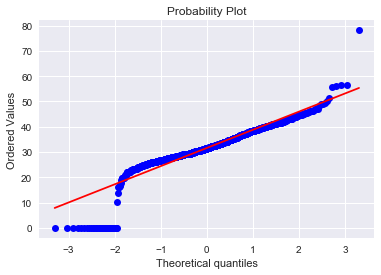

In [185]:
stats.probplot(sqrt_totalbsmtsf, plot=plt)

In [186]:
transformed_train_data['TotalBsmtSF'] = train_data['TotalBsmtSF']

#### 2ndFlrSF

mean vs. std of variable. Impact expected if <4:  0.794281240216394
kurtosis. Should be 0:  -0.5544838992134586
z_kurtosis. Should be <2.58 and >-2.58. (1.96 respectively):  -4.32325612028
skewness. Should be 0:  0.8134655722163397
z_skew: should be <2.58 and >-2.58. (1.96 respectively): 12.6850212196


/Users/claudine/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


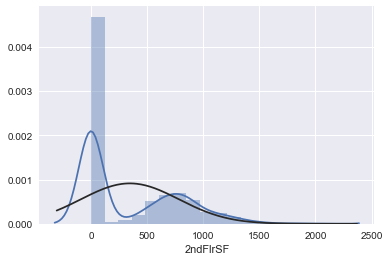

In [202]:
check_normality(train_data['2ndFlrSF'])

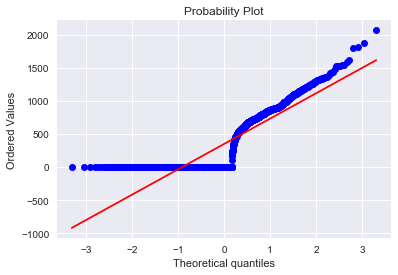

In [203]:
check_linearity(train_data["2ndFlrSF"])

In [207]:
transformed_train_data['2ndFlrSF'] = train_data['2ndFlrSF']

#### GrLivArea

#### BsmtFullBath

#### FullBath

#### HalfBath

#### BedroomAbvGr

#### KitchenAbvGr

#### Fireplaces

#### GarageCars

#### WoodDeckSF

#### OpenPorchSF

#### EnclosedPorch

#### ScreenPorch

#### PoolArea

#### MiscVal
This value is given in $ dollars. Inflation not respected.

## Standard scale to be looked at